# Predição das Notas de Matemática do ENEM 2016
**Por:** Diego Luiz Vieira Domingues.

### Contatos Profissionais: 
- E-mail: [dluiz815@gmail.com](dluiz815@gmail.com)
- LinkedIn: [Perfil](https://www.linkedin.com/in/diego-luiz-ds/)
- GitHub: [Perfil](https://github.com/Diegohluiz)

<img src="img/logo-enem-2016.png" />

<h1 style="color:blue;">O Problema:</h1>
<h2> Construa um modelo para prever as notas de matemática do ENEM 2016 com base nos dados registrados nos arquivos train.csv e test.csv.</h2>

> Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

<h1 style="color:blue;">A base de dados:</h1>

 O contexto do desafio gira em torno dos resultados do **ENEM 2016** (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Os dados, na forma que se encontram nos arquivos train.csv e test.csv, foram disponibilizados pela <a href="https://www.codenation.dev/">codenation</a>.

Os dados oficiais do ENEM, de qualquer edição, podem ser econtrados no seguinte link: http://inep.gov.br/web/guest/microdados

<h1 style="color:red;">Observação:</h1>
<h3>Modelo em construção.</h3>

Este é o resultado alcançado com nosso primeiro modelo criado para termos uma baseline a ser batida por novos modelos e(ou) feature selection, feature engineering, ajustes de hiperparâmetros e combinações destas.

***SEU SCORE:*** 93.707571%

<h1 style="color:blue;">Dicionário de dados:</h1>

Todas as features do conjunto de dados que vamos trabalhar aqui possuem sua descrição detalhada no arquivo ***Dicionario_Microdados_Enem_2016***, disponível na pasta dicionario-de-dados.

Dentre as inúmeras features destacamos algumas delas, como:

> - **NU_NOTA_MT** --> Nossa variável alvo.
- **TP_PRESENCA**

# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Algumas configurações do matplotlib e seaborn
%matplotlib inline

plt.rc("figure", figsize=(15, 15))

sns.set(style="dark", palette="Accent")

# Importando os dados de teste

> Decidir começar importando os dados do arquivo de testes para verificar quais são as features que estão disponíveis nessa base. Deste modo, sabermos quais as features poderemos utilizar da base de treino.

- ***Obs. importante***: A variável target (***NU_NOTA_MT***) somente está disponível no arquivo train.csv

In [3]:
x_test = pd.read_csv("test.csv")
x_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


# Análise Exploratória dos Dados de TESTE

In [4]:
# Algumas informações importantes do nosso DataFrame de teste
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

> Como podemos observar, a nossa base de testes contém **4.576 registros** e possui apenas **47 features** de tipos de dados variados, como object(texto, nesse caso), float e int.

Vamos agora fazer uma rápida análise descritiva dos nossos dados.

In [5]:
x_test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


Dentre várias informações da tabela acima, uma em particular é muito interessante e podemos iremos fazer uso da mesma mais a frente:
> Não possuímos **valores negativos** na nossa base de dados de teste, conforme demonstrado abaixo:

In [6]:
(x_test.describe().loc["min"] < 0).sum()

0

# Verificando os dados faltantes

In [7]:
nans_x_test = x_test.isna().sum()
nans_x_test.name = "Base de Testes"
nans_x_test

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

## Agora vamos verificar, através de um gráfico, os valores faltantes em nossa base de testes. Para isso, vamos utilizar um gráfico de barras.

Vamos definir uma função que irá plotar nosso gráfico

In [8]:
x_test.shape

(4576, 47)

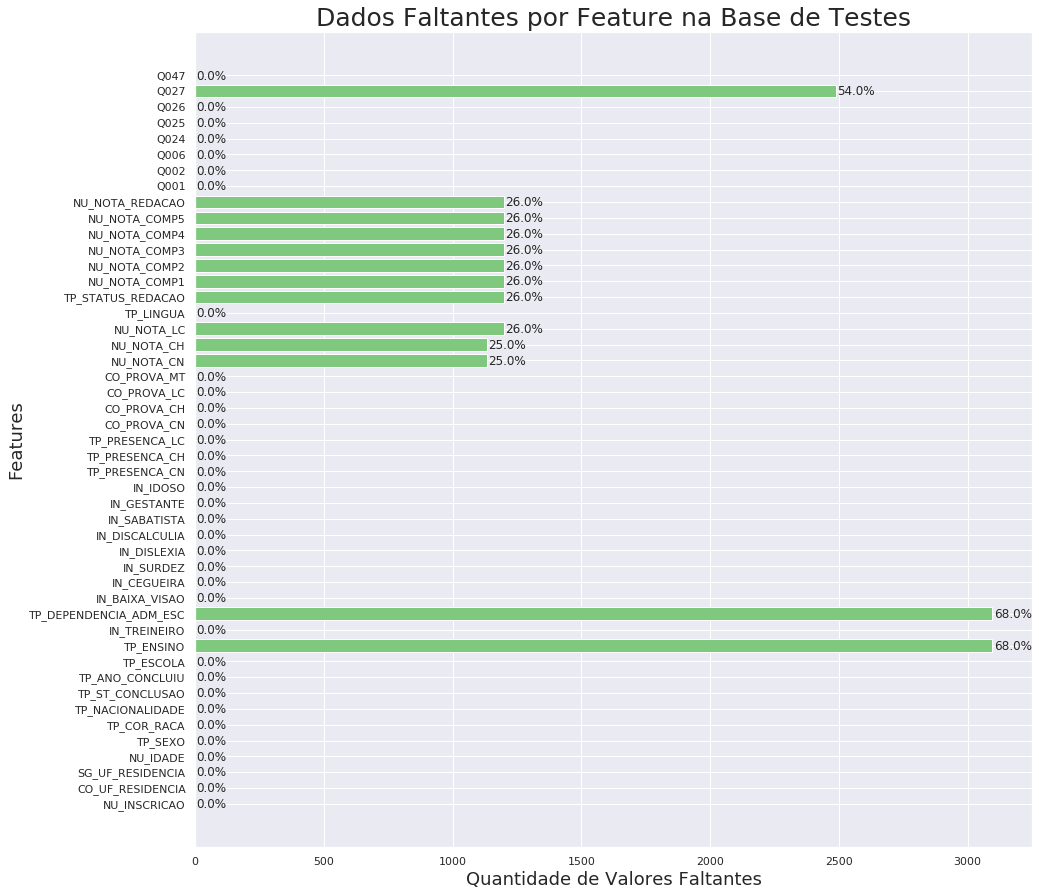

In [11]:
def plota_nulos(nulos, df):
    plt.barh(y=nulos.index, width=nulos.values)
    for indice, valor in enumerate(nulos):
        plt.text(valor + 5, indice - 0.25, "{}%".format(round(valor * 100/ df.shape[0], 0)))
    plt.title("Dados Faltantes por Feature na {}".format(nulos.name), fontsize=25)
    plt.xlabel("Quantidade de Valores Faltantes", fontsize=18)
    plt.ylabel("Features", fontsize=18)
    plt.grid(True)
    
plota_nulos(nans_x_test, x_test)

Como podemos notar pelo gráfico acima, temos muitas features da nossa base de testes com **valores faltantes**.
Algumas chegam ter até **68%** de seus registros vazios, como é o caso das features **TP_ENSINO** e **TP_DEPENDENCIA_AD_ESC**.

# O que fazer com os dados faltantes?
> Vamos iniciar com soluções mais simples e depois vamos melhorando nossas estratégias, conforme necessário.


> Para começar, decidi preencher todos os valores faltantes por **-1** já que, este valor está fora do range das nossas features, como concluímos na ánalise descritiva dos dados. 

> Nosso objetivo aqui é que o modelo "interprete" esse valor como outlier.

***obs.:*** Outras estratégias como deletar, substituir por zero, pela média, pela mediana, ou até mesmo algum tipo de interpolação, podem ser testadas afim de melhorar a performance do nosso modelo mais a adiante. 


In [12]:
# Preenchendo os valores faltantes por -1.
x_test.fillna(-1, inplace=True)

> Iremos utilizar todas as features da base de teste, exceto a variável ***NU_INSCRIÇÂO***

In [13]:
x_test = x_test.drop(columns="NU_INSCRICAO")
x_test

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,-1.0,...,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,-1.0,...,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,...,80.0,320.0,E,E,D,B,B,A,-1,A
3,15,PA,27,F,3,1,1,8,1,-1.0,...,-1.0,-1.0,H,E,G,B,B,A,-1,A
4,41,PR,18,M,1,1,2,0,2,1.0,...,0.0,320.0,D,H,H,C,B,A,-1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,500.0,E,E,D,A,B,A,-1,A
4572,35,SP,17,M,2,1,2,0,2,1.0,...,100.0,520.0,C,C,C,A,A,A,-1,A
4573,35,SP,19,M,1,1,1,2,1,-1.0,...,80.0,640.0,D,F,D,B,B,A,-1,D
4574,52,GO,17,M,2,2,3,0,1,-1.0,...,80.0,520.0,C,E,C,A,A,A,-1,A


In [14]:
# Obtendo o nome das features selecionadas
features = x_test.columns.to_list()
features

['CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [15]:
# Verificando as dimensões do nosso novo Data Frame
x_test.shape

(4576, 46)

# Agora vamos trabalhar com os dados da base de treino.
## Importando os dados de treino

In [16]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


> Como podemos notar abaixo, nossa base de dados de treino possui ***13.730 registros*** e ***167 colunas***.

In [17]:
df_train.shape

(13730, 167)

## Antes de seguirmos para análise exploratória dos dados, vamos limitar nosso Data Frame de treino apenas às features que também estão presentes nos dados de teste + a variável target "NU_NOTA_MT".

In [18]:
features.append("NU_NOTA_MT")
df_train = df_train[features]
df_train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


Agora nossa base de dados de treino contem as **46 features** da base de teste mais a variável target **NU_NOTA_MT**, totalizando as 47 colunas que vemos abaixo. Além disso, nosso novo Data Frame continua com todos os **13.730 registros** iniciais. 

In [19]:
df_train.shape

(13730, 47)


# Análise Exploratória dos Dados de TREINO

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               4282 non-null   float64
 10  IN_TREINEIRO            13730 non-null  int64  
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

Na tabela abaixo, temos algumas medidas da estatística descritiva dessa nossa base de dados.

In [21]:
df_train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


Conforme vemos abaixo, este data set também ***não possui valores negativos.***

In [22]:
(df_train.describe().loc["min"] < 0).sum()


0

# Verificando os valores faltantes nos dados de TREINO

In [24]:
df_train.isna().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_

# Visualização Gráfica dos valores faltantes no data set de TREINO.

> Assim como fizemos para os dados de teste, plotaremos um gráfico de barras usando a função plota_nulos para visalizarmos os **valores faltantes** em nossa base de **treino**.

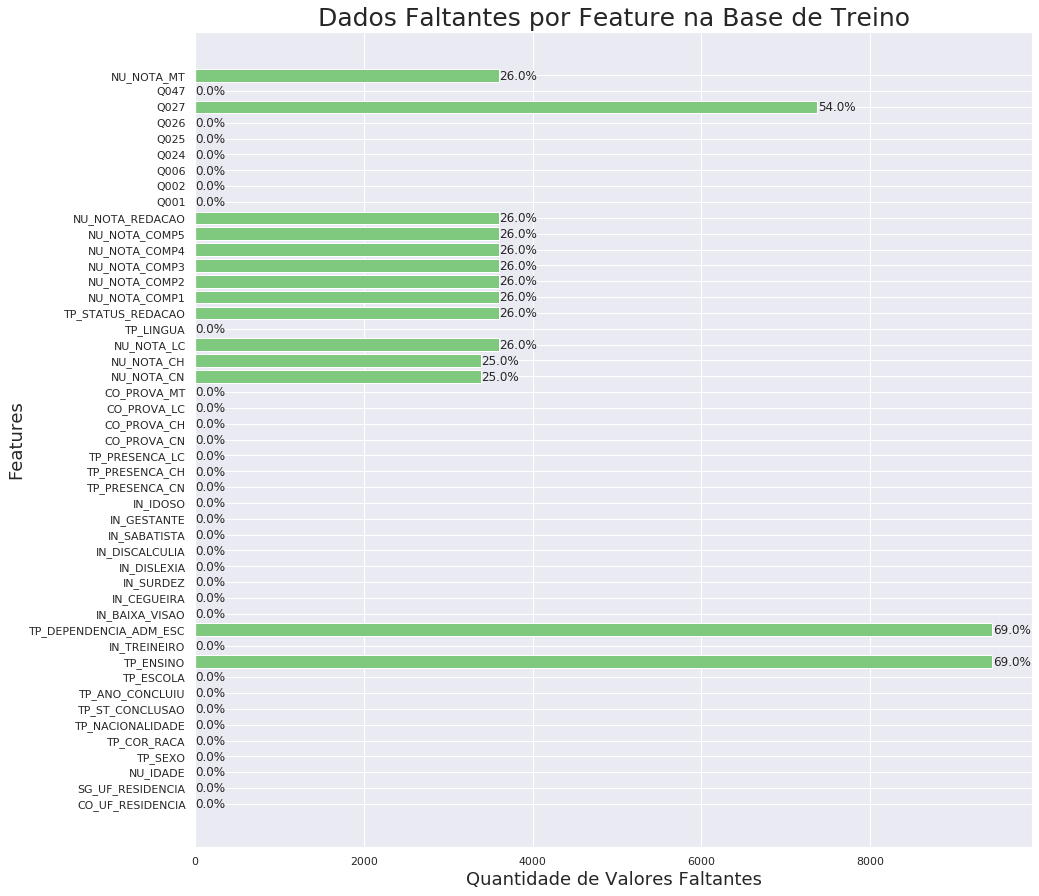

In [25]:
nans_x_train = df_train.isna().sum()
nans_x_train.name = "Base de Treino"

plota_nulos(nans_x_train, df_train)

In [ ]:
# Preenchendo todos os missing values com -1
df_train.fillna(-1, inplace=True)

In [ ]:
df_train.isna().sum().sum()

# Selecionando os dados de treino em features e target

In [ ]:
x_train  = df_train[features]
y_train  = df_train["NU_NOTA_MT"]

In [ ]:
x_train

In [ ]:
y_train.shape

# Encodando as variáveis categóricas com OneHotEncoder

In [ ]:
# Separando as features em catergóricas e numéricas
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]

cat_features = [i for i in features if i[:2] in siglas_categoricas]
num_features = x_train.columns.drop(cat_features)

In [ ]:
x_train[cat_features]

In [ ]:
# Encodando variáveis categóricas como onehotencode
x_train_cat = x_train[cat_features].astype(str)

ohe = OneHotEncoder(sparse=False, handle_unknown="ignore", dtype=np.int)
ohe.fit(x_train_cat)
x_train_encoded = ohe.transform(x_train_cat)

In [ ]:
# Criando dataframe com as features categóricas encodadas
cat_features_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
cat_features_encoded

In [ ]:
# Aplicando o transform nos dados de teste
x_test_encoded = ohe.transform(x_test[cat_features].astype(str))

In [ ]:
x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(x_test[cat_features].columns))

In [ ]:
x_test_encoded

In [ ]:
x_test = pd.concat([x_test_encoded, x_test[num_features]], axis=1)
x_test

In [ ]:
# Montando o datafram de treino final. Cocatenando o dataframe das features categoricas com as numericas
x_train = pd.concat([cat_features_encoded, x_train[num_features]], axis=1)
x_train

# Criando e treinando o modelo
## Decision Tree

In [ ]:
clf_dt = DecisionTreeRegressor()
clf_dt.fit(x_train, y_train)

In [ ]:
predict_dt = clf_dt.predict(x_test)
predict_dt = pd.Series(predict_dt , name="NU_NOTA_MT")
predict_dt

# Criando arquivo para submeter o teste

In [ ]:
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_dt], axis=1)
answer

In [ ]:
# Score da Decision tree = 91.5

In [ ]:
answer.to_csv("answer.csv", index=False)

In [ ]:
# Treinando uma Random Forest
clf_rf = RandomForestRegressor()
clf_rf.fit(x_train, y_train)

predict_rf = clf_rf.predict(x_test)
predict_rf = pd.Series(predict_rf , name="NU_NOTA_MT")

df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict_rf], axis=1)
answer

In [ ]:
answer.to_csv("answer.csv", index=False)

In [ ]:
# Score random forest = 93.7075